# 2: Explicit ODE Solver

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_3state_model, CSTR_1state_model
from Solvers import ExplicitEulerFixedSteps, ExplicitEulerAdaptiveStep

## Stability plot for the Explicit Euler method

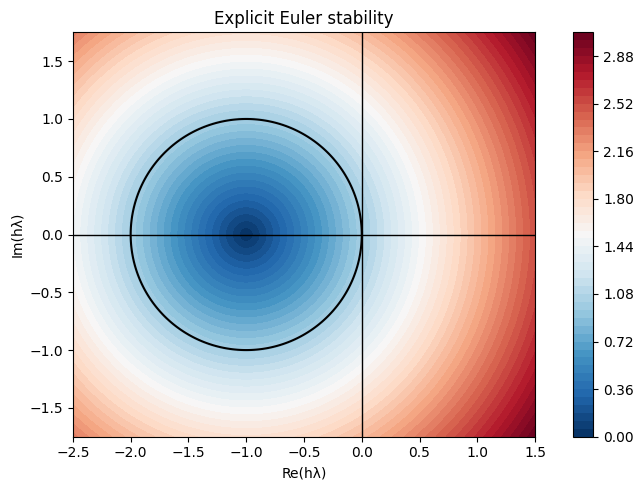

In [2]:
# Create grid in the complex plane
x = np.linspace(-2.5, 1.5, 400)
y = np.linspace(-1.75, 1.75, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for Explicit Euler: R(z) = 1 + z
R = 1 + Z
R_mag = np.abs(R)

# Plot
plt.figure(figsize=(8, 5))
cp = plt.contourf(X, Y, R_mag, levels=50, cmap="RdBu_r")
cbar = plt.colorbar(cp)

# Add the stability boundary: |R(z)| = 1
plt.contour(X, Y, R_mag, levels=[1], colors='black')

# Axis formatting
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.title("Explicit Euler stability")
plt.xlabel("Re(hλ)")
plt.ylabel("Im(hλ)")
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()


## Test algorithms on test problems

### Prey-predator problem

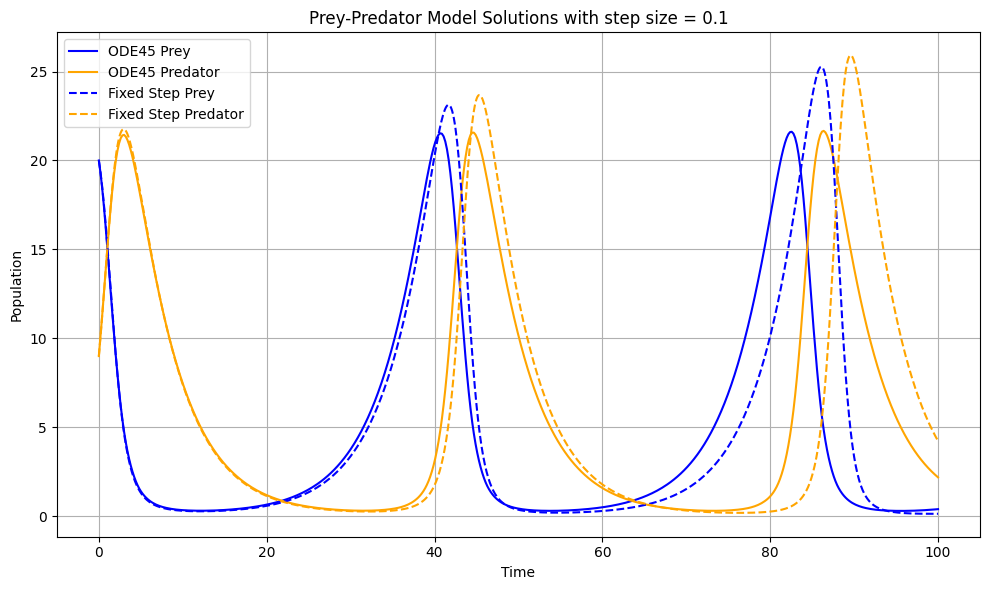

In [3]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 500))

# Solve using Explicit Euler with fixed step size
N = 1000
solution_fixed_t, solution_fixed_x = ExplicitEulerFixedSteps(f, t_span[0], t_span[1], N, x0)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.1')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

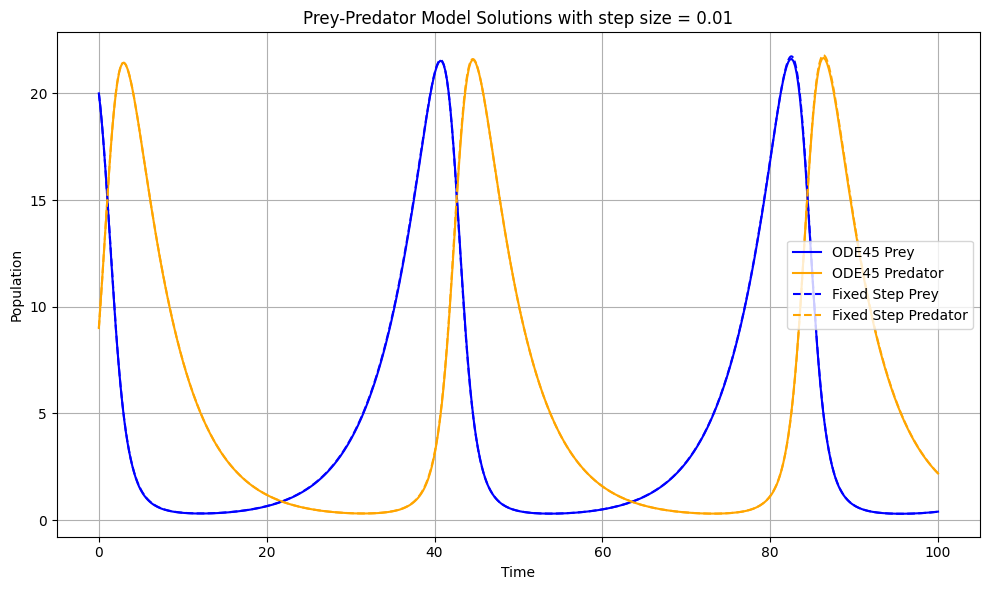

In [4]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 500))

# Solve using Explicit Euler with fixed step size
N = 10000
solution_fixed_t, solution_fixed_x = ExplicitEulerFixedSteps(f, t_span[0], t_span[1], N, x0)


# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(solution_ode45.t, solution_ode45.y[0], label='ODE45 Prey', color='blue')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='ODE45 Predator', color='orange')
plt.plot(solution_fixed_t, solution_fixed_x[0], label='Fixed Step Prey', linestyle='--', color='blue')
plt.plot(solution_fixed_t, solution_fixed_x[1], label='Fixed Step Predator', linestyle='--', color='orange')
plt.title('Prey-Predator Model Solutions with step size = 0.01')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [5]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

f, J = prey_predator_model(a, b)
# Solve using Explicit Euler with adaptive step size
h_min = 0.01
h_max = 0.1
abs_tol = 1e-6
rel_tol = 1e-6


solution_adaptive_t, solution_adaptive_x, solution_adaptive_h = ExplicitEulerAdaptiveStep(f, t_span, x0, h_min, h_max, abs_tol, rel_tol)





ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
plt.plot(solution_adaptive.t, solution_adaptive.y[0], label='Adaptive Step Prey', linestyle=':', color='blue')
plt.plot(solution_adaptive.t, solution_adaptive.y[1], label='Adaptive Step Predator', linestyle=':', color='orange')